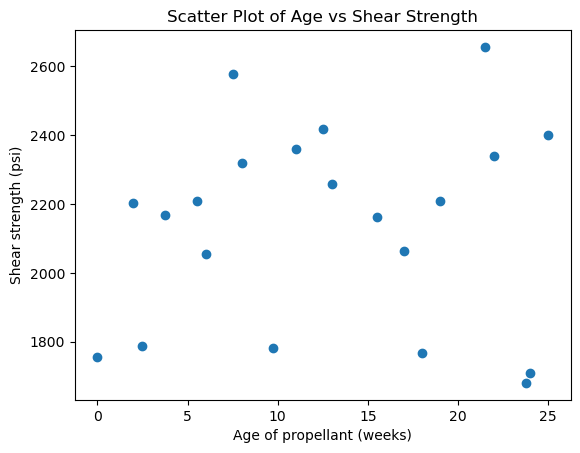

Least Squares Coefficients: Intercept = 2106.5906, Slope = 2.3908


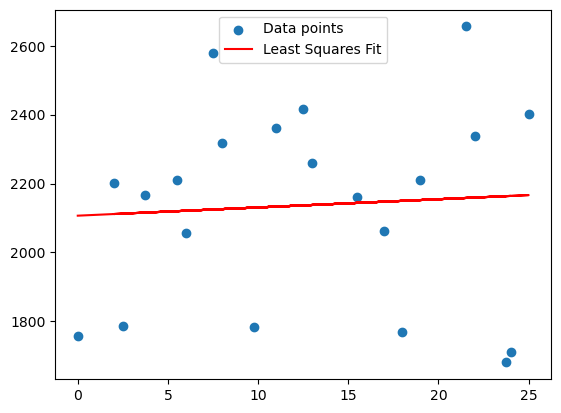

Gradient Descent Coefficients: Intercept = 2097.4978, Slope = 2.9110


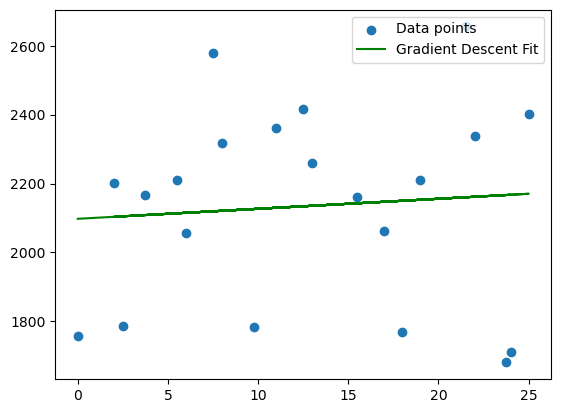

Custom Stochastic Gradient Descent: Intercept = 2114.7677, Slope = 10.6314


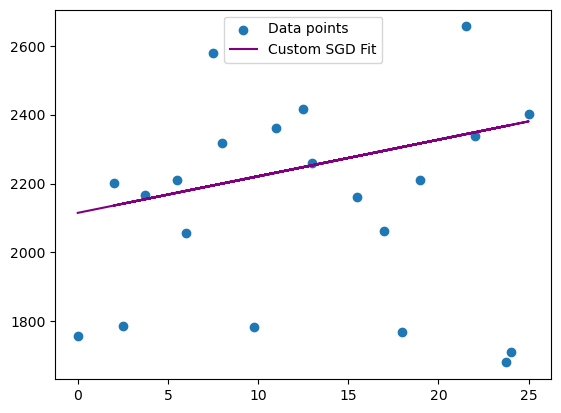

Sklearn SGDRegressor Coefficients: Intercept = 2094.2540, Slope = 18.2561


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


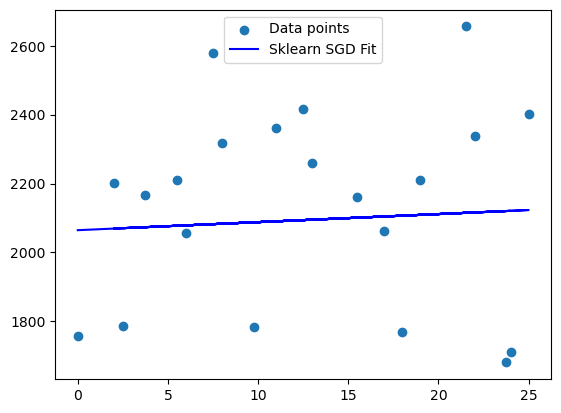

Mean Squared Error (Least Squares): 80605.9941
Mean Squared Error (Batch Gradient Descent): 80628.5587
Mean Squared Error (Custom SGD): 97513.8690
Mean Squared Error (Sklearn SGDRegressor): 82434.7860


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = {
    "shear": [2160.70, 1680.15, 2318.00, 2063.30, 2209.30, 2209.50, 1710.30, 1786.70,
              2577.90, 2359.90, 2258.70, 2167.20, 2401.55, 1781.80, 2338.75, 1767.30,
              2055.50, 2416.40, 2202.50, 2656.20, 1755.70],
    "age": [15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50, 7.50, 11.00,
            13.00, 3.75, 25.00, 9.75, 22.00, 18.00, 6.00, 12.50, 2.00, 21.50, 0.00]
}

# Create DataFrame
df = pd.DataFrame(data)
# Remove last data point in age with 0.00 (since shear has 21 points, age has 21)
# The shear has 21 points, age has 21, so all matched.

# Extract X and y
X = df['age'].values.reshape(-1, 1)
y = df['shear'].values

# Plot original data
plt.scatter(X, y)
plt.xlabel('Age of propellant (weeks)')
plt.ylabel('Shear strength (psi)')
plt.title('Scatter Plot of Age vs Shear Strength')
plt.show()

# Least Squares solution using normal equation
def least_squares(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best

theta_least_squares = least_squares(X, y)
print(f"Least Squares Coefficients: Intercept = {theta_least_squares[0]:.4f}, Slope = {theta_least_squares[1]:.4f}")

y_pred_least_squares = theta_least_squares[0] + theta_least_squares[1] * X.flatten()
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred_least_squares, color='red', label='Least Squares Fit')
plt.legend()
plt.show()

# Batch Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - learning_rate * gradients
        if np.isnan(theta).any():
            print("NaN encountered, stopping iterations.")
            break
    return theta

theta_gradient_descent = gradient_descent(X, y, learning_rate=0.001, n_iterations=10000)
print(f"Gradient Descent Coefficients: Intercept = {theta_gradient_descent[0]:.4f}, Slope = {theta_gradient_descent[1]:.4f}")

y_pred_gd = theta_gradient_descent[0] + theta_gradient_descent[1] * X.flatten()
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred_gd, color='green', label='Gradient Descent Fit')
plt.legend()
plt.show()

# Custom Stochastic Gradient Descent (your original implementation)
def stochastic_gradient_descent_custom(X, y, learning_rate=0.001, n_iterations=100000):
    m = len(y)
    X_b = sm.add_constant(X)  # Add constant for intercept
    theta = np.array([3000, -0.1])  # initial guess
    
    for iteration in range(n_iterations):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]  # shape (1, 2)
        yi = y[random_index:random_index+1]    # shape (1,)
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients.flatten()
    return theta

theta_sgd_custom = stochastic_gradient_descent_custom(X, y)
print(f"Custom Stochastic Gradient Descent: Intercept = {theta_sgd_custom[0]:.4f}, Slope = {theta_sgd_custom[1]:.4f}")

y_pred_sgd_custom = theta_sgd_custom[0] + theta_sgd_custom[1] * X.flatten()
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred_sgd_custom, color='purple', label='Custom SGD Fit')
plt.legend()
plt.show()

# sklearn SGDRegressor (with scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sgd_reg = SGDRegressor(max_iter=2000, tol=1e-3, eta0=0.001, random_state=42)
sgd_reg.fit(X_scaled, y)

theta_sklearn = [sgd_reg.intercept_[0], sgd_reg.coef_[0]]
print(f"Sklearn SGDRegressor Coefficients: Intercept = {theta_sklearn[0]:.4f}, Slope = {theta_sklearn[1]:.4f}")

y_pred_sklearn = sgd_reg.predict(X_scaled)
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred_sklearn, color='blue', label='Sklearn SGD Fit')
plt.legend()
plt.show()

# Calculate Mean Squared Errors for all
mse_ls = mean_squared_error(y, y_pred_least_squares)
mse_gd = mean_squared_error(y, y_pred_gd)
mse_sgd_custom = mean_squared_error(y, y_pred_sgd_custom)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print(f"Mean Squared Error (Least Squares): {mse_ls:.4f}")
print(f"Mean Squared Error (Batch Gradient Descent): {mse_gd:.4f}")
print(f"Mean Squared Error (Custom SGD): {mse_sgd_custom:.4f}")
print(f"Mean Squared Error (Sklearn SGDRegressor): {mse_sklearn:.4f}")
